In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('train.csv')

# Drop columns with a high percentage of missing values
threshold = 0.8
df = df.dropna(thresh=threshold*len(df), axis=1)

# Drop any remaining rows with missing values
df.dropna(inplace=True)

# Select relevant features for training
features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']
target = 'SalePrice'
X = df[features]
y = df[target]

# Apply label encoding to categorical variables
label_encoder = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1000326084.6995956


In [107]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
# Import the training and validation set
df = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [109]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

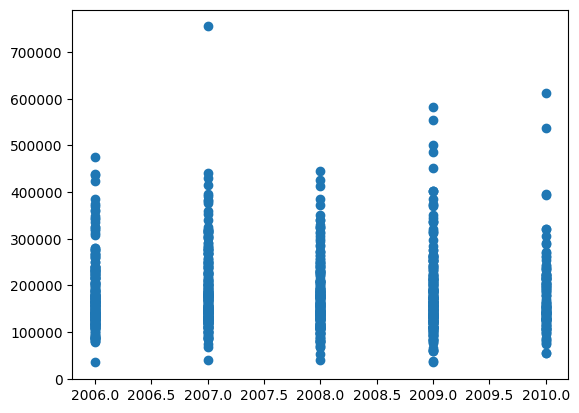

In [111]:
fig, ax = plt.subplots()
ax.scatter(df["YrSold"][:1000], df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

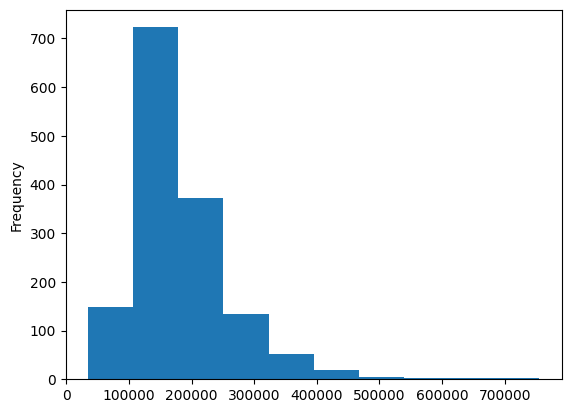

In [112]:
df.SalePrice.plot.hist()

In [113]:
# Sort DataFrame in date order
df.sort_values(by=["YrSold"], inplace=True, ascending=True)
df.head(20).T

,781,1219,281,569,1220,571,1223,577,270,976,975,266,585,970,1231,262,969,1235,1237,1238
Id,782,1220,282,570,1221,572,1224,578,271,977,976,267,586,971,1232,263,970,1236,1238,1239
MSSubClass,60,160,20,90,20,20,20,80,60,30,160,60,20,50,90,80,190,70,60,20
MSZoning,RL,RM,FV,RL,RL,RL,RL,RL,FV,RL,FV,RL,RL,RL,RL,RL,RL,RL,RL,RL
LotFrontage,65.0,21.0,60.0,NaN,66.0,60.0,89.0,96.0,84.0,51.0,NaN,70.0,88.0,60.0,70.0,88.0,75.0,96.0,41.0,63.0
LotArea,7153,1680,7200,7032,7800,7332,10680,11777,10728,5900,2651,11207,11443,10800,7728,8471,10382,13132,12393,13072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,7,4,5,12,11,10,10,5,8,8,4,6,3,12,5,7,3,7,9,3
YrSold,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
SaleType,WD,WD,New,WD,WD,WD,WD,WD,New,WD,WD,WD,New,WD,WD,WD,ConLD,WD,WD,WD
SaleCondition,Normal,Abnorml,Partial,Normal,Abnorml,Abnorml,Normal,Abnorml,Partial,Normal,Normal,Normal,Partial,Abnorml,Normal,Normal,Normal,Normal,Normal,Abnorml


In [114]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()
df_tmp2 = df2.copy()

In [115]:
df_tmp2.T

,0,1,2,3,4,5,6,7,8,9,...,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458
Id,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,...,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919
MSSubClass,20,20,60,60,120,60,20,60,20,20,...,180,160,20,160,160,160,160,20,85,60
MSZoning,RH,RL,RL,RL,RL,RL,RL,RL,RL,RL,...,RM,RM,RL,RM,RM,RM,RM,RL,RL,RL
LotFrontage,80.0,81.0,74.0,78.0,43.0,75.0,NaN,63.0,85.0,70.0,...,21.0,21.0,80.0,21.0,21.0,21.0,21.0,160.0,62.0,74.0
LotArea,11622,14267,13830,9978,5005,10000,7980,8402,10176,8400,...,1470,1484,13384,1533,1526,1936,1894,20000,10441,9627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,0,12500,0,0,0,0,500,0,0,0,...,0,0,0,0,0,0,0,0,700,0
MoSold,6,6,3,6,1,4,3,5,2,4,...,4,5,5,12,6,6,4,9,7,11
YrSold,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,...,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD


In [116]:
from sklearn.preprocessing import OneHotEncoder

# Get the unique categories
categories = df_tmp.select_dtypes(include='object').columns

# Create a new dataframe with one-hot encoded columns
df_encoded = pd.get_dummies(df_tmp, columns=categories)

# Print the encoded dataframe
df_tmp =  df_encoded

In [117]:



for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)
    # Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
                # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

from sklearn.preprocessing import StandardScaler


# Get the numeric columns
numeric_columns = df_tmp.select_dtypes(include=['number']).columns

# Create a scaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df_tmp[numeric_columns])

# Scale the data
df_tmp[numeric_columns] = scaler.transform(df_tmp[numeric_columns])
    



Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
Alley_Grvl
Alley_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neig

In [118]:
df_tmp

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage_is_missing,MasVnrArea_is_missing,GarageYrBlt_is_missing
781,0.122193,0.073375,-0.220875,-0.337130,-0.071836,-0.517200,0.686666,0.345679,-0.570750,-0.124226,...,True,False,False,False,False,True,False,False,False,False
1219,1.161423,2.438219,-2.219047,-0.885645,-0.071836,-0.517200,-0.008870,-0.671845,0.735503,-0.973018,...,True,True,False,False,False,False,False,False,False,True
281,-1.064144,-0.872563,-0.447940,-0.332419,-0.071836,-0.517200,1.150356,1.024029,-0.194372,1.011884,...,False,False,False,False,False,False,True,False,False,False
569,-0.380814,0.782828,-0.039223,-0.349257,-0.795151,-0.517200,0.256096,-0.284216,-0.570750,1.095228,...,True,False,False,False,False,True,False,True,False,False
1220,1.163796,-0.872563,-0.175462,-0.272286,-0.795151,-0.517200,-0.240715,-1.011019,-0.570750,-0.288720,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,-0.893311,-0.636078,-0.447940,-0.200126,-0.071836,2.179628,-1.433062,0.878668,-0.570750,-0.973018,...,True,False,False,False,False,True,False,False,False,False
1322,1.405809,0.073375,1.686470,-0.033156,0.651479,-0.517200,0.686666,0.345679,-0.570750,0.505240,...,True,False,False,False,False,True,False,False,False,False
162,-1.346492,-0.872563,1.141515,0.166887,0.651479,-0.517200,1.117235,0.975575,0.680153,1.661090,...,False,False,False,False,False,False,True,False,False,False
158,-1.355983,0.073375,1.368580,0.203969,0.651479,-0.517200,1.084115,0.975575,-0.570750,-0.486114,...,True,False,False,False,False,True,False,False,False,False


In [119]:
df_tmp

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage_is_missing,MasVnrArea_is_missing,GarageYrBlt_is_missing
781,0.122193,0.073375,-0.220875,-0.337130,-0.071836,-0.517200,0.686666,0.345679,-0.570750,-0.124226,...,True,False,False,False,False,True,False,False,False,False
1219,1.161423,2.438219,-2.219047,-0.885645,-0.071836,-0.517200,-0.008870,-0.671845,0.735503,-0.973018,...,True,True,False,False,False,False,False,False,False,True
281,-1.064144,-0.872563,-0.447940,-0.332419,-0.071836,-0.517200,1.150356,1.024029,-0.194372,1.011884,...,False,False,False,False,False,False,True,False,False,False
569,-0.380814,0.782828,-0.039223,-0.349257,-0.795151,-0.517200,0.256096,-0.284216,-0.570750,1.095228,...,True,False,False,False,False,True,False,True,False,False
1220,1.163796,-0.872563,-0.175462,-0.272286,-0.795151,-0.517200,-0.240715,-1.011019,-0.570750,-0.288720,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,-0.893311,-0.636078,-0.447940,-0.200126,-0.071836,2.179628,-1.433062,0.878668,-0.570750,-0.973018,...,True,False,False,False,False,True,False,False,False,False
1322,1.405809,0.073375,1.686470,-0.033156,0.651479,-0.517200,0.686666,0.345679,-0.570750,0.505240,...,True,False,False,False,False,True,False,False,False,False
162,-1.346492,-0.872563,1.141515,0.166887,0.651479,-0.517200,1.117235,0.975575,0.680153,1.661090,...,False,False,False,False,False,False,True,False,False,False
158,-1.355983,0.073375,1.368580,0.203969,0.651479,-0.517200,1.084115,0.975575,-0.570750,-0.486114,...,True,False,False,False,False,True,False,False,False,False


In [120]:
df_tmp.head().T

,781,1219,281,569,1220
Id,0.122193,1.161423,-1.064144,-0.380814,1.163796
MSSubClass,0.073375,2.438219,-0.872563,0.782828,-0.872563
LotFrontage,-0.220875,-2.219047,-0.44794,-0.039223,-0.175462
LotArea,-0.33713,-0.885645,-0.332419,-0.349257,-0.272286
OverallQual,-0.071836,-0.071836,-0.071836,-0.795151,-0.795151
...,...,...,...,...,...
SaleCondition_Normal,True,False,False,True,False
SaleCondition_Partial,False,False,True,False,False
LotFrontage_is_missing,False,False,False,True,False
MasVnrArea_is_missing,False,False,False,False,False


In [136]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice,test_size=.3)

In [137]:
%%time
# This won't work since we've got missing numbers and categories
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(X_train, y_train)

CPU times: total: 24.5 s
Wall time: 3.41 s


RandomForestRegressor(n_jobs=-1)

In [138]:
# Score the model
model.score(X_train, y_train)

0.9770738248227153

In [139]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)
# Score the model
reg.score(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

0.9264866715414732

In [140]:
df_tmp2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [141]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = model.predict(X_test)
y_preds

array([-1.25708735e-01, -6.86093630e-01, -7.16348383e-01, -8.87494640e-01,
       -2.13979896e-01, -6.69787325e-01, -3.35019343e-02, -1.02582404e+00,
        1.17594998e-02,  6.94731994e-01, -6.56530180e-01, -2.13079352e-02,
        2.44650683e+00,  7.57493710e-01, -7.22312977e-01,  3.33555459e-01,
       -1.13370730e+00, -2.24011591e-01, -4.95130660e-01, -9.62677516e-01,
       -5.71264360e-01, -6.66956132e-01,  3.48428375e-02, -1.14826998e+00,
        1.91392158e-01,  2.24909343e-02, -8.38616144e-01, -1.46393668e-01,
       -3.42798537e-01, -3.38445635e-02,  1.57420934e+00, -5.82338927e-01,
       -4.25366137e-01,  1.04732366e+00, -3.56916009e-03, -1.37938118e-01,
       -9.50089802e-02, -4.31244979e-01, -3.88284109e-01, -1.03985157e+00,
        5.74512037e-02,  4.69905647e-01, -2.74955810e-01, -6.74135228e-01,
        6.53235326e-01, -8.51181105e-01, -6.80337434e-01,  1.63358783e+00,
        1.53636675e+00,  2.68257417e-02, -7.98956906e-01, -5.00132845e-01,
       -3.99138442e-01,  

In [142]:
from sklearn.metrics import mean_squared_error
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_preds)

print('Mean squared error:', mse)

Mean squared error: 0.1419615292655664


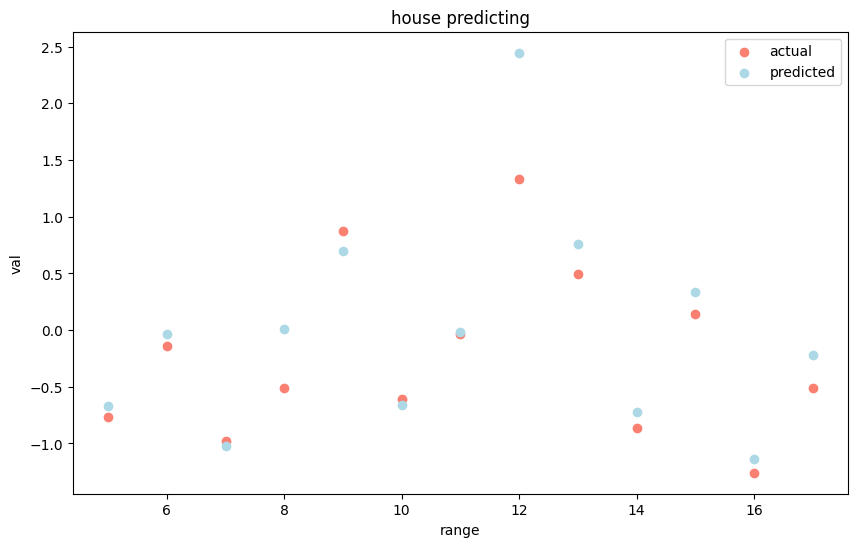

In [143]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(np.arange(5,18), 
            y_test[5:18], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(np.arange(5,18), 
            y_preds[5:18], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("house predicting")
plt.xlabel("range")
plt.legend(["actual", "predicted"])
plt.ylabel("val");

In [144]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_preds)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.2328403000099267


In [145]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_preds)
print('R-squared Score:', r2)

R-squared Score: 0.855541991375056
